# Emotion Color Association Analysis

##### This Jupyter notebook is designed to analyze the association between different emotions and colors. The data used in this notebook is based on a research study that asked participants to associate colors with specific emotion words. The results of this study have been compiled into a CSV file, where each row represents a color associated with an emotion word, along with the frequency and percentage of that association.

##### By the end of this notebook, we will have a clear understanding of how different emotions are associated with different colors, and we will have a preprocessed dataset that can be used to train a machine learning model to predict emotions based on colors.

##### I use the pdf named : "Color associations to emotion and emotion-laden words: A collection of norms for stimulus construction and selection " 

### Load the data 
- Load into a DataFrame
- Print the first few rows of the DataFrame

In [1]:
import pandas as pd

# Load the Data
negative_df = pd.read_csv('negative_emotion_words.csv')
positive_df = pd.read_csv('positive_emotion_words.csv')

# Count unique words and colors in negative emotions
negative_unique_words = negative_df['Word'].nunique()
negative_unique_colors = negative_df['Color'].nunique()

# Count unique words and colors in positive emotions
positive_unique_words = positive_df['Word'].nunique()
positive_unique_colors = positive_df['Color'].nunique()

# Print the results
print(f'Negative Emotions: {negative_unique_words},      Unique colors = {negative_unique_colors}')
print(f'Positive Emotions: {positive_unique_words},      Unique colors = {positive_unique_colors}')

Negative Emotions: 36,      Unique colors = 50
Positive Emotions: 29,      Unique colors = 53


### Data Analysis on "negative_emotion_words.csv"

In [21]:
import pandas as pd

# Load the Data
negative_df = pd.read_csv('negative_emotion_words.csv')

# Ensure 'Percentage' is of string type
negative_df['Percentage'] = negative_df['Percentage'].astype(str)

# Convert 'Percentage' to numerical format
negative_df['Percentage'] = pd.to_numeric(negative_df['Percentage'].str.rstrip('%'), errors='coerce') / 100.0

# Convert 'Freq' to numerical format
negative_df['Freq'] = pd.to_numeric(negative_df['Freq'], errors='coerce')

# Create a Function to Map Emotions to Top 3 Colors Based on Frequency
def rank_colors_by_emotion_negative():
    # Get unique emotions
    unique_emotions = negative_df['Word'].unique()
    
    # For each emotion, get associated colors and rank them by frequency
    for emotion in unique_emotions:
        print(f'Emotion: {emotion}')
        # Filter colors for this emotion
        colors = negative_df[negative_df['Word'] == emotion]
        if not colors.empty:
            # Sort colors by 'Freq' and select the top 3
            ranked_colors = colors.sort_values('Freq', ascending=False).head(3)
            # Reset index and drop the old one
            ranked_colors = ranked_colors.reset_index(drop=True)
            print(ranked_colors[['Color', 'Freq', 'Percentage']])
        else:
            print("No colors associated with a significant frequency for this emotion.")
        print('\n')

# Call the function
rank_colors_by_emotion_negative()

Emotion: Afraid
   Color  Freq  Percentage
0  Black  50.0        0.50
1    Red  27.0        0.27
2   Blue  10.0        0.10


Emotion: Agony
   Color  Freq  Percentage
0  Black  49.0        0.49
1    Red  32.0        0.32
2  Brown   8.0        0.08


Emotion: Angry
   Color  Freq  Percentage
0    Red  79.0        0.79
1  Black  14.0        0.14
2  Brown   2.0        0.02


Emotion: Anguished
  Color  Freq  Percentage
0   Red  36.0        0.36
1  Gray  16.0        0.16
2  Blue  15.0        0.15


Emotion: Contempt
   Color  Freq  Percentage
0    Red  25.0        0.25
1  Black  19.0        0.19
2   Blue  16.0        0.16


Emotion: Cruel
   Color  Freq  Percentage
0    Red  46.0        0.46
1  Black  34.0        0.34
2  Green   6.0        0.06


Emotion: Depressed
   Color  Freq  Percentage
0   Blue  43.0        0.43
1  Black  31.0        0.31
2   Gray  12.0        0.12


Emotion: Discouraged
   Color  Freq  Percentage
0   Blue  29.0        0.29
1  Black  25.0        0.25
2    Red  15.0 

In [16]:
# import pandas as pd

# # Load the Data
# negative_df = pd.read_csv('negative_emotion_words.csv')

# # Ensure 'Percentage' is of string type
# negative_df['Percentage'] = negative_df['Percentage'].astype(str)

# # Convert 'Percentage' to numerical format
# negative_df['Percentage'] = pd.to_numeric(negative_df['Percentage'].str.rstrip('%'), errors='coerce') / 100.0

# # Convert 'Freq' to numerical format
# negative_df['Freq'] = pd.to_numeric(negative_df['Freq'], errors='coerce')

# # Create a Function to Map Emotions to Top 3 Colors Based on Frequency and save to CSV
# def rank_colors_by_emotion_negative():
#     # Get unique emotions
#     unique_emotions = negative_df['Word'].unique()
    
#     # DataFrame to hold all results
#     all_emotions = pd.DataFrame(columns=['Word', 'Color1', 'Color2', 'Color3'])

#     # For each emotion, get associated colors and rank them by frequency
#     for emotion in unique_emotions:
#         # Filter colors for this emotion
#         colors = negative_df[negative_df['Word'] == emotion]
#         if not colors.empty:
#             # Sort colors by 'Freq' and select the top 3
#             ranked_colors = colors.sort_values('Freq', ascending=False).head(3)
#             # Extract the color names only
#             top_colors = ranked_colors['Color'].tolist()
#             # Ensure we have exactly three colors, fill with None if less
#             top_colors += [None] * (3 - len(top_colors))
#             # Append the result as a new row in the DataFrame
#             new_row = pd.DataFrame([{'Word': emotion, 'Color1': top_colors[0], 'Color2': top_colors[1], 'Color3': top_colors[2]}])
#             all_emotions = pd.concat([all_emotions, new_row], ignore_index=True)
#         else:
#             print(f"No colors associated with a significant frequency for the emotion: {emotion}")
#             new_row = pd.DataFrame([{'Word': emotion, 'Color1': None, 'Color2': None, 'Color3': None}])
#             all_emotions = pd.concat([all_emotions, new_row], ignore_index=True)

#     # Save all results to CSV
#     all_emotions.to_csv('negative_emotion_colors_ranked.csv', index=False)
#     print("Results saved to 'negative_emotion_colors_ranked.csv'.")

# # Call the function
# rank_colors_by_emotion_negative()

Results saved to 'negative_emotion_colors_ranked.csv'.


### Data Analysis on "positive_emotion_words.csv"

In [22]:
import pandas as pd

# Load the Data
positive_df = pd.read_csv('positive_emotion_words.csv')

# Ensure 'Percentage' is of string type
positive_df['Percentage'] = positive_df['Percentage'].astype(str)

# Convert 'Percentage' to numerical format
positive_df['Percentage'] = pd.to_numeric(positive_df['Percentage'].str.rstrip('%'), errors='coerce') / 100.0

# Convert 'Freq' to numerical format
positive_df['Freq'] = pd.to_numeric(positive_df['Freq'], errors='coerce')

# Create a Function to Map Colors to Positive Emotions and Rank Them by Frequency
def rank_colors_by_emotion_positive():
    # Get unique emotions
    unique_emotions = positive_df['Word'].unique()
    
    # For each emotion, get associated colors and rank them by frequency
    for emotion in unique_emotions:
        print(f'Emotion: {emotion}')
        # Filter colors for this emotion with frequency greater than 40%
        colors = positive_df[(positive_df['Word'] == emotion) & (positive_df['Freq'] > 20)]
        if not colors.empty:
            # Sort colors by frequency in descending order and take the first 3
            ranked_colors = colors.sort_values('Freq', ascending=False).head(3)
            # Reset index and drop the old one
            ranked_colors = ranked_colors.reset_index(drop=True)
            print(ranked_colors[['Color', 'Freq', 'Percentage']])
        else:
            print("No colors associated with significant frequency for this emotion.")
        print('\n')

# Call the function
rank_colors_by_emotion_positive()

Emotion: Admired
  Color  Freq  Percentage
0   Red    43        0.43


Emotion: Affection
  Color  Freq  Percentage
0   Red    49        0.49
1  Pink    28        0.28


Emotion: Aroused
  Color  Freq  Percentage
0   Red    63        0.63


Emotion: Astonished
    Color  Freq  Percentage
0  Yellow    24        0.24
1   White    21        0.21


Emotion: Beautiful
  Color  Freq  Percentage
0  Pink    36        0.35


Emotion: Brave
  Color  Freq  Percentage
0   Red    36        0.36
1  Blue    28        0.28


Emotion: Cheer
    Color  Freq  Percentage
0  Yellow    38        0.38
1     Red    24        0.24


Emotion: Confident
  Color  Freq  Percentage
0   Red    32        0.31
1  Blue    26        0.25


Emotion: Elated
    Color  Freq  Percentage
0  Yellow    21        0.21
1   White    21        0.21
2    Blue    21        0.21


Emotion: Friendly
    Color  Freq  Percentage
0  Yellow    41        0.41


Emotion: Grateful
  Color  Freq  Percentage
0  Blue    22        0.22


Emotion

##### this is another way but i don't combine these csv file 

In [17]:
# import pandas as pd

# # Load the Data
# positive_df = pd.read_csv('positive_emotion_words.csv')

# # Ensure 'Percentage' is of string type
# positive_df['Percentage'] = positive_df['Percentage'].astype(str)

# # Convert 'Percentage' to numerical format
# positive_df['Percentage'] = pd.to_numeric(positive_df['Percentage'].str.rstrip('%'), errors='coerce') / 100.0

# # Convert 'Freq' to numerical format
# positive_df['Freq'] = pd.to_numeric(positive_df['Freq'], errors='coerce')

# # Create a Function to Map Colors to Positive Emotions and Rank Them by Frequency, and save to CSV
# def rank_colors_by_emotion_positive():
#     # Get unique emotions
#     unique_emotions = positive_df['Word'].unique()
    
#     # DataFrame to hold all results
#     all_emotions = pd.DataFrame(columns=['Word', 'Color1', 'Color2', 'Color3'])

#     # For each emotion, get associated colors and rank them by frequency
#     for emotion in unique_emotions:
#         # Filter colors for this emotion with frequency greater than 20%
#         colors = positive_df[(positive_df['Word'] == emotion) & (positive_df['Freq'] > 20)]
#         if not colors.empty:
#             # Sort colors by 'Freq' and select the top 3
#             ranked_colors = colors.sort_values('Freq', ascending=False).head(3)
#             # Extract the color names only
#             top_colors = ranked_colors['Color'].tolist()
#             # Ensure we have exactly three colors, fill with None if less
#             top_colors += [None] * (3 - len(top_colors))
#             # Append the result as a new row in the DataFrame
#             new_row = pd.DataFrame([{'Word': emotion, 'Color1': top_colors[0], 'Color2': top_colors[1], 'Color3': top_colors[2]}])
#             all_emotions = pd.concat([all_emotions, new_row], ignore_index=True)
#         else:
#             print(f"No colors associated with a significant frequency for the emotion: {emotion}")
#             new_row = pd.DataFrame([{'Word': emotion, 'Color1': None, 'Color2': None, 'Color3': None}])
#             all_emotions = pd.concat([all_emotions, new_row], ignore_index=True)

#     # Save all results to CSV
#     all_emotions.to_csv('positive_emotion_colors_ranked.csv', index=False)
#     print("Results saved to 'positive_emotion_colors_ranked.csv'.")

# # Call the function
# rank_colors_by_emotion_positive()

Results saved to 'positive_emotion_colors_ranked.csv'.


### Combine the above csv files 

In [23]:
import pandas as pd

# Load the datasets
negative_df = pd.read_csv('negative_emotion_words.csv')
positive_df = pd.read_csv('positive_emotion_words.csv')

# Optionally, add a column to indicate the emotion type if needed
negative_df['Type'] = 'Negative'
positive_df['Type'] = 'Positive'

# Combine the datasets
combined_df = pd.concat([negative_df, positive_df], ignore_index=True)

# Save the combined dataset
combined_df.to_csv('combined_emotion_colors.csv', index=False)

In [24]:
# Analyze color-emotion associations
color_emotion_counts = combined_df.groupby(['Color', 'Word']).size().reset_index(name='Counts')

# Sorting to find the most frequent color-emotion pairs
sorted_color_emotions = color_emotion_counts.sort_values(by='Counts', ascending=False)
print(sorted_color_emotions.head())


             Color       Word  Counts
0    Antique white    Hopeful       1
490         Purple  Surprised       1
470         Purple        Joy       1
471         Purple       Kind       1
472         Purple     Lonely       1


### Create the Image Scale
- Select Dimensions: Decide on the dimensions for the image scale (e.g., warm/cool, soft/hard, clear/grayish) based on the emotions associated with each color.
- Map Colors to Dimensions: Assign each color to a point in the scale based on the emotional words associated with it and their intensity.
- Normalize the Data: Ensure that color assignments are normalized so that the scale is balanced.
- Visualization: Create a visual representation of the image scale.

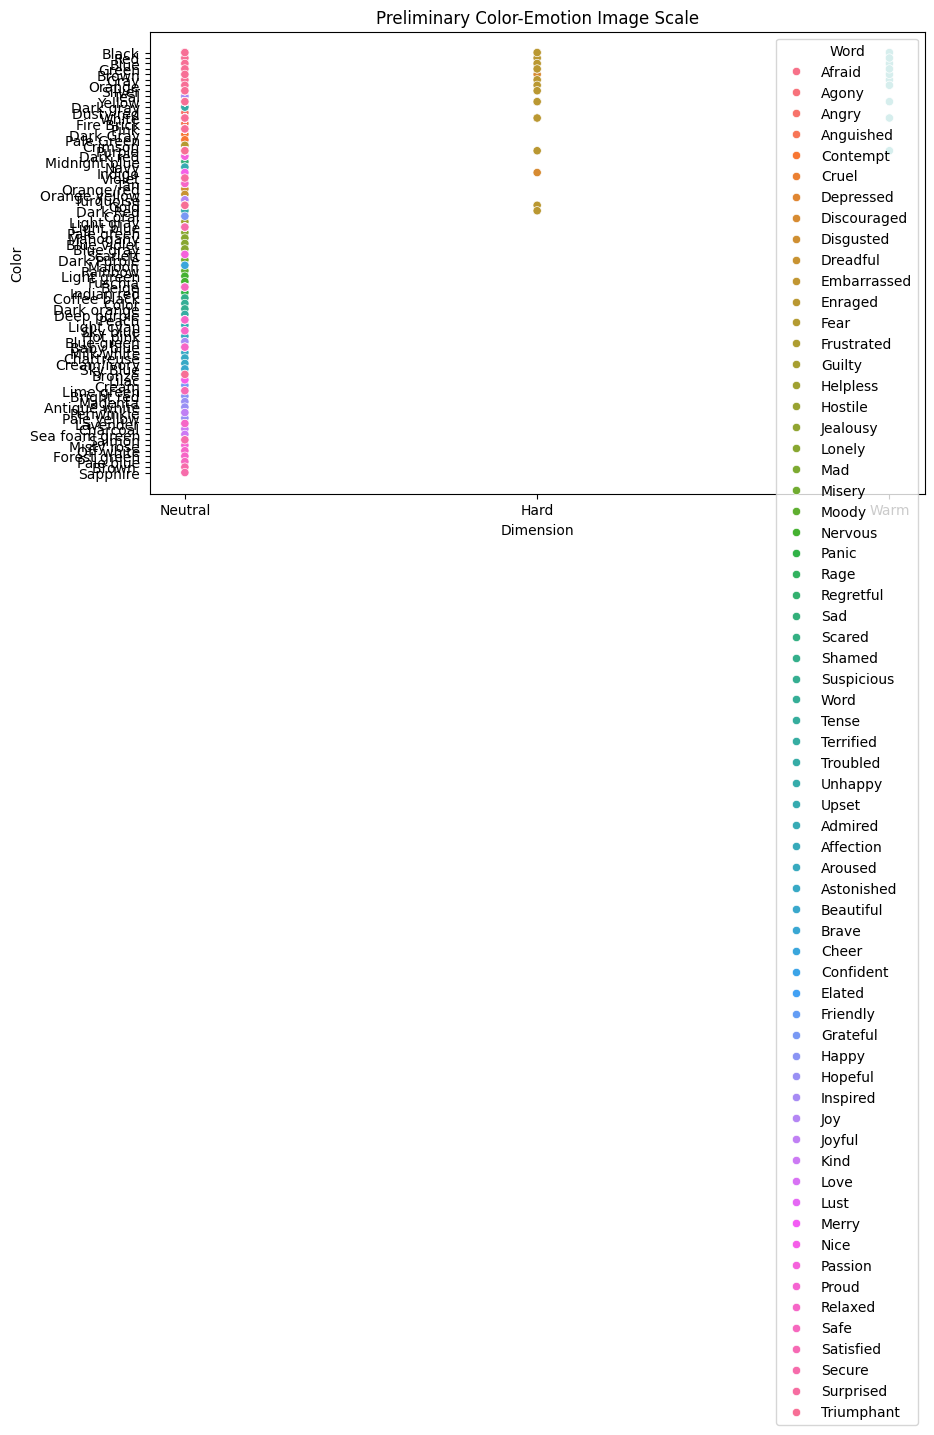

In [26]:
# Assuming dimensions are set as per the analysis
# Example: Mapping colors based on simplified emotional analysis

# Define function to assign dimensions
def assign_dimensions(row):
    if 'happy' in row['Word'] or 'joy' in row['Word']:
        return 'Warm'
    elif 'sad' in row['Word'] or 'lonely' in row['Word']:
        return 'Cool'
    elif 'angry' in row['Word'] or 'rage' in row['Word']:
        return 'Hard'
    elif 'calm' in row['Word'] or 'relaxed' in row['Word']:
        return 'Soft'
    else:
        return 'Neutral'

# Apply the function
combined_df['Dimension'] = combined_df.apply(assign_dimensions, axis=1)

# Visualization (this is a placeholder for actual visualization code)
# Plotting would typically use matplotlib or seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot as a simple visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dimension', y='Color', hue='Word', data=combined_df)
plt.title('Preliminary Color-Emotion Image Scale')
plt.show()
